# CALC I 06 Partial Derivatives
**References**

My Calculus learning notebook following the live lesson series by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:  
- https://learning.oreilly.com/videos/calculus-for-machine/9780137398171/
- https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb 

In [2]:
import numpy as np
import torch
import math # for constant pi
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

## 6.1 Derivatives of Multivariate Functions

https://www.geogebra.org/3d

Enables the calculation of derivatives of multivariate equations.

Consider the equation $z = x^2 - y^2$
- There are two variables in the equation. 
- When we plot it and look at the graph, we can see the derivative for each variable. 

(-0.5, 881.5, 582.5, -0.5)

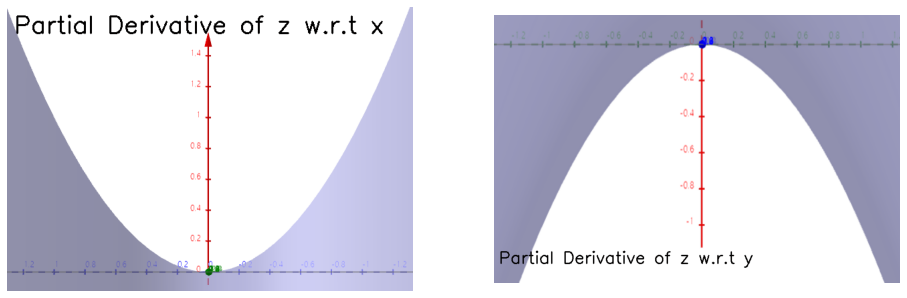

In [ ]:
# partial derivative of z with respect to x and y
pathx = "/content/derivativezx.png"
pathy = "/content/derivativezy.png"

img_zx = cv2.imread(pathx)
img_zx = cv2.putText(img_zx, "Partial Derivative of z w.r.t x", org=(10, 40), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.2, color=1, thickness=2)
img_zy = cv2.imread(pathy)
img_zy = cv2.resize(img_zy, dsize=(0,0), fx=1.5, fy=1.7)
img_zy = cv2.putText(img_zy, "Partial Derivative of z w.r.t y", org=(10, 540), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.2, color=1, thickness=2)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].imshow(img_zx)
ax[0].axis('off')
ax[1].imshow(img_zy)
ax[1].axis('off')

The partial derivative of $z$ w.r.t. $x$ is obtained by considering $y$ to be a constant.  

$$z = x^2 - y^2$$  
$$\frac{\delta z}{\delta x} = 2x - 0 = 2x$$

Because when we compute the derivative of a constant, it simply becomes zero. (derivative is derived from variables, not constants cause there is no change in the latter).

Define a function&emsp;  $f(x, y)$ &emsp; for &emsp; $z = x^2 - y^2$

In [3]:
def f(x, y):
  return x**2 - y**2

Plot $z$ w.r.t. $x$ by varying $x$.

In [4]:
xs = np.linspace(-3,3,1000)

... while holding $y$ constant (e.g., at $y=0$):

In [5]:
zs_wrt_x = f(xs, 0)

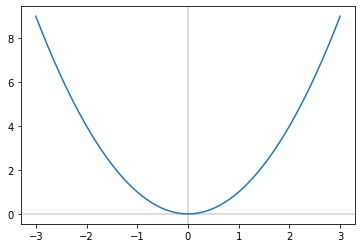

In [6]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
ax.plot(xs, zs_wrt_x)



To determine the slope of $z$ w.r.t. $x$ at a given point along the curve, we can use the partial derivative from the slides: $$ \frac{\partial z}{\partial x} = 2x$$ 



In [7]:
def delz_delx(x, y):  # you are passing in y for nothing. There is no place for y! :O !
  return 2*x

In [8]:
x_samples = np.arange(-2, 3, 1)
x_samples

array([-2, -1,  0,  1,  2])

In [28]:
colours = ['red', 'firebrick', 'darkred', 'maroon', 'brown']
def point_and_tangent_wrt_x(xs, x, y, f, fprime, col):
  z = f(x, y)   # z = f(x, y)
  plt.scatter(x, z, c=col)

  tangent_m = fprime(x, y)  # Slope is partial derivative of f(x, y) w.r.t. x
  tangent_b = z - tangent_m * x
  tangent_line = tangent_m * xs + tangent_b

  plt.plot(xs, tangent_line, c=col, linestyle='dashed', linewidth=2, label=f'z = {z}')
  plt.legend()

Notes of some thoughts: 
In essence, partial derivative can be understood as a kind of dimensionality reduction because, in this particular example, it turns of one of the two variables off. So the equation that draws something in 3 dimension is brought down to 2 dimension. 

It is like a selective vision - you see only what you want to see. We don't want to see (or think about) $y$ at the moment. So we put it aside even though it's still there. 

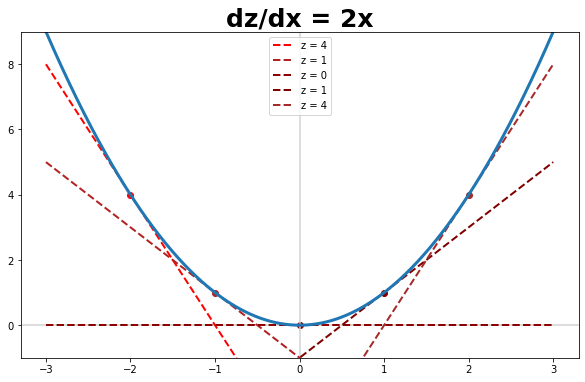

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
  point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colours[i])

plt.ylim(-1, 9)
plt.title("dz/dx = 2x", fontsize=25, fontweight='bold')
ax.plot(xs, zs_wrt_x, linewidth=3)

Interpretatino of the above graph: 
- For each z point, the derivative (slope) is marked in dashed line. For the quadratic equation of $z = x^2 - y^2$ with 3 variables (multivariate), the output ($z$) is computed only with respect to a single input variable ($x$). 


In [30]:
def visualise(path, size=None):
  img = cv2.imread(path)
  if (size != None):
    img = cv2.resize(img, dsize=(0,0), fx=size[0], fy=size[1])
  cv2_imshow(img)

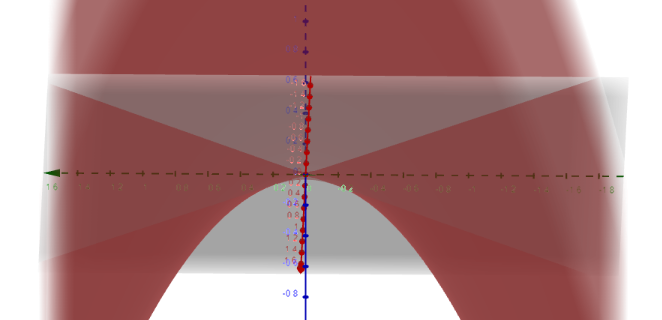

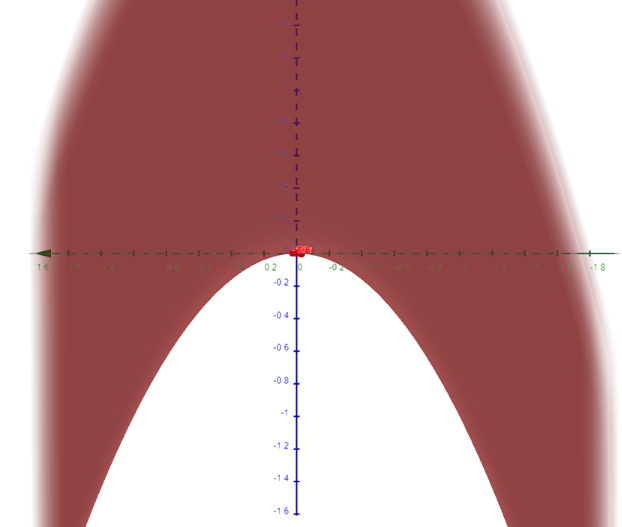

In [34]:
shape_of_y = "/content/shape of y.png"
y_below_z0 = "/content/y below z0.png"

visualise(shape_of_y, size=(0.75, 0.75))
visualise(y_below_z0, size=(0.75, 0.75))

Using the same principle, we can calculate the partial derivative of y by turning off $x$.

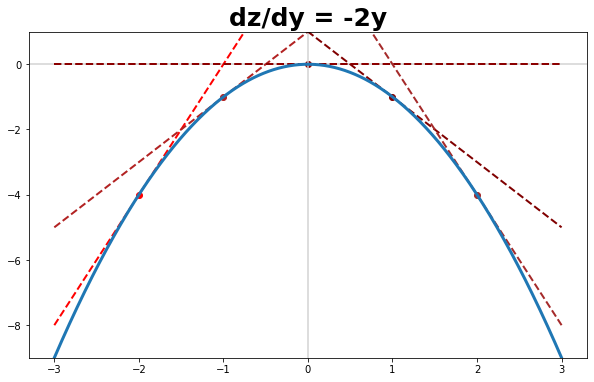

In [50]:
ys = np.linspace(-3, 3, 1000)
y_samples = np.arange(-2, 3, 1)

def f(x, y):
  return x**2 - y**2

def delz_dely(x, y):
  return -2 * y

zs_wrt_y = f(0, ys)

fig, ax = plt.subplots(figsize=(10, 6))
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
  z = f(0, y)   # z = f(x, y)
  plt.scatter(y, z, c=colours[i])

  tangent_m = delz_dely(0, y)  # Slope is partial derivative of f(x, y) w.r.t. x
  tangent_b = z - tangent_m * y
  tangent_line = tangent_m * ys + tangent_b
  plt.plot(ys, tangent_line, c=colours[i], linestyle='dashed', linewidth=2, label=f'z = {z}')

plt.title("dz/dy = -2y", fontsize=25, fontweight='bold')
plt.ylim(-9, 1)
ax.plot(ys, zs_wrt_y, linewidth=3)

The graph is inverted because of the negative sign before $y$. 

Now let's plot $z$ with respect to $y$ by varying $y$...

In [52]:
zs_wrt_y = f(0, ys)

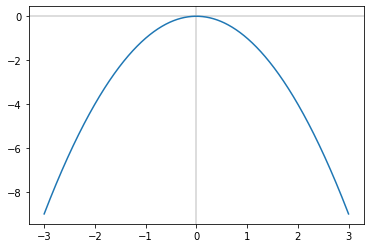

In [54]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
ax.plot(ys, zs_wrt_y)

As in the slides, the partial derivative of $z$ w.r.t $y$ happens to be independent of $x$ (just as we observed $x$ is independent of $y$ above), so while $z$ varies as a function of both $x$ and $y$, the slope of $z$ w.r.t $y$ is the same no matter what $x$ is: $$ \frac{\partial z}{\partial y} = -2y $$

So for example, holding $x$ constant at 2 instead of 0 increases $z$, but has no impact whatsoever on the slope of $z$ w.r.t. $y$:


Text(0.5, 1.0, 'z raised by the x constant\nbut there is no effect on the slopes of y.')

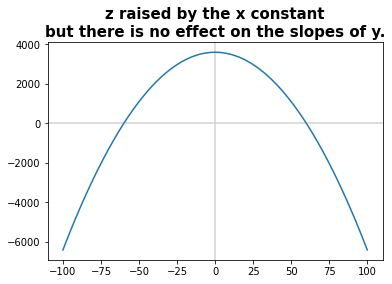

In [65]:
ys = np.linspace(-100, 100, 10000)
zs_wrt_y = f(60, ys)
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
ax.plot(ys, zs_wrt_y)
ax.set_title('z raised by the x constant\nbut there is no effect on the slopes of y.', 
             fontsize=15, fontweight='bold')

## 6.2 Partial Derivative Exercises



## 6.3 Geometrical Examples




## 6.4 Geometrical Exercises



## 6.5 Notation



## 6.6 Chain Rule



## 6.7 Chain Rule Exercises

# Frequent Functions
- ```cv2.putText(img, "text", org=(0, 15), fontFace=cv2.FONT_, fontScale=1, color=1, thickness=1)```  

  https://github.com/Coding-Forest/2021-Mathematics/blob/main/03%20Calculus%20for%20ML%20(Jon%20Krohn)/CALC%20I%2005%20Automatic%20Differentiation.ipynb

# Error Notes
